### Estimate enzyme concentration in a growing population of _E coli_ cells

### a) Derive the steady-state protein concentration 

Starting from the mRNA ($m_{i}$) and protein ($p_{i}$) balances from the course notes:

\begin{eqnarray}
\dot{m}_{i} &=& r_{X,i}\bar{u}_{i}-\left(\mu+\theta_{m,i}\right)m_{i}\qquad{i=1,2,\dots,N}\\
\dot{p}_{i} &=& r_{L,i}w_{i}-\left(\mu+\theta_{p,i}\right)p_{i}
\end{eqnarray}

derive an expression describing the intracellular steady-state protein concentration of the form:
\begin{equation}
p^{*}_{i}\simeq\mathcal{K}_{L,i}\mathcal{K}_{X,i}\bar{u}_{i}w_{i}
\end{equation}

where $\mathcal{K}_{L,i}$ denotes the translation gain for protein $i$,
$\mathcal{K}_{X,i}$ denotes the transcription gain for the gene encoding protein $i$,
$\bar{u}_{i}$ denotes the transcriptional control function (unregulated and regulated) for the gene encoding protein $i$, and
$w_{j}$ denotes the translational control function for protein $i$.

Starting from the steady-state mRNA balance equation, at steady-state, all time derivatives vanish giving:

\begin{equation}
r_{X,i}\bar{u}_{i} - \left(\mu+\theta_{m,i}\right)m^{*}_{i} = 0
\end{equation}

which can be solved for the steady-state mRNA concentration:

\begin{equation}
m_{i}^{*} = \left[\frac{r_{X,i}}{\left(\mu+\theta_{m,i}\right)}\right]\bar{u}_{i}
\end{equation}
Thus, the gain $\mathcal{K}_{X}$:

\begin{equation}
\mathcal{K}_{X} \equiv \left[\frac{r_{X,i}}{\left(\mu+\theta_{m,i}\right)}\right]
\end{equation} is the kinetic limit of transcription normalized by the sum of the degradation and dilution terms. From the class notes, and the problem assumptions, the rate of translation reduces to:

\begin{equation}\label{eq:kinetic-translation}
	r_{L,j} \simeq k^{L}_{E,j}R_{L,T}\left(\frac{m_{j}}{\tau_{L,j}K_{L,j}}\right)
\end{equation} 

which after substitution gives:

\begin{equation}
r_{L,j} = \left(\frac{k^{L}_{E,j}R_{L,T}}{\tau_{L,j}K_{L,j}}\right)\mathcal{K}_{X}\bar{u}_{i}
\end{equation}

At steady-state, we can solve the protein balance for the steady-state protein concentration $p_{i}^{*}$:

\begin{equation}
p_{i}^{*} \simeq \frac{r_{L,i}w_{i}}{\left(\mu+\theta_{p,i}\right)}
\end{equation}

and substitute the $r_{L,i}$ into the steady-state protein balance:

\begin{equation}
p_{i}^{*} \simeq \left(\frac{k^{L}_{E,j}R_{L,T}}{\left(\mu+\theta_{p,i}\right)\tau_{L,j}K_{L,j}}\right)\mathcal{K}_{X}\bar{u}_{i}w_{i}
\end{equation}

Thus, the term in the parenthesis is the translation gain $\mathcal{K}_{L}$, or:

\begin{equation}
p_{i}^{*} \simeq \mathcal{K}_{L,i}\mathcal{K}_{X,i}\bar{u}_{i}w_{i}
\end{equation}

### b) Estimate the translation gain and plot the steady-state protein concentration versus $\bar{u}_{i}$

The parameters required to calculate the translation gain are in the ``Parameters.toml`` file. I've written the function ``calculate_translation_gain`` to take these parameters (stored in a dictionary) and compute the translation gain

In [5]:
# include -
include("Solution.jl")

calculate_translation_gain (generic function with 1 method)

In [2]:
# load the parameters dictionary -
pd = load_parameter_dictionary("./Parameters.toml")

Dict{AbstractString,Any} with 12 entries:
  "translation_sat_constant"   => 200.0
  "protein_read_length"        => 300
  "volume_ecoli_cell"          => 1.0e-15
  "transcription_gain"         => 1.2
  "protein_half_life"          => 24
  "ribosome_elongation_rate"   => 14.0
  "ecoli_doubling_time"        => 40
  "ecoli_fraction_water"       => 0.7
  "ribsosome_copy_number"      => 26000.0
  "characteristic_read_length" => 333
  "tau_L"                      => 0.225
  "mass_ecoli_cell"            => 4.3e-13

In [3]:
KL = calculate_translation_gain(pd) # units: mumol/gDW

150.88903507474765

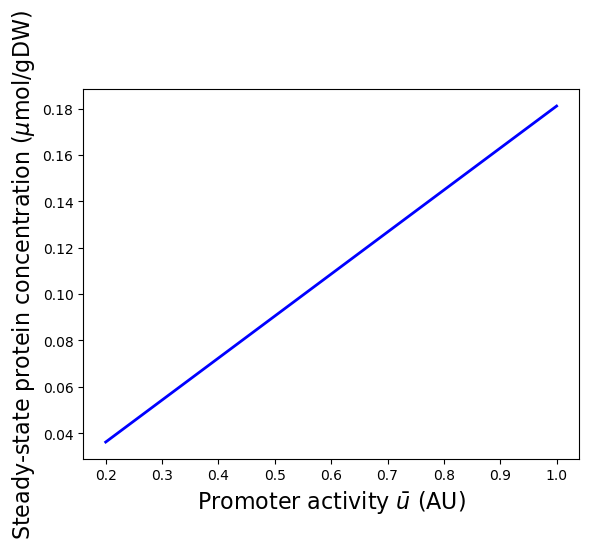

PyObject Text(37.000000000000014, 0.5, 'Steady-state protein concentration ($\\mu$mol/gDW)')

In [6]:
# make the plot -
p_star_array = Array{Float64,1}()
u_value_array = collect(range(0.2,stop=1.0,length=100)) # note: we start at the lower end of the u-range from P1 NOT 0!
KX = 1.2*(1e6/1e9) # KX from P1 converted to mumol/gDW
for (index,u_value) in enumerate(u_value_array)
    tmp_value = KL*KX*u_value
    push!(p_star_array,tmp_value)
end

# plot -
plot(u_value_array,p_star_array,"b",lw=2)
xlabel(L"Promoter activity $\bar{u}$ (AU)",fontsize=16)
ylabel(L"Steady-state protein concentration ($\mu$mol/gDW)",fontsize=16)

#### sanity check: looked up some protein concentrations on BioNumbers - is our estimate close?

In [9]:
# need to convert from copies/cell to mumol/gDW -
# found the *maximal value* of the CbpA protein, see BIND:107995
AVN = 6.02e23
M = pd["mass_ecoli_cell"]
WF = pd["ecoli_fraction_water"]
literature_value = 15000 # BIND:107995 units: copies/cell
PTEST = (literature_value)*(1/AVN)*(1/M)*(1/(1-WF))*(1e6)

0.19315460094259448